In [18]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [19]:
# Load datasets
clean_data_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\clean_data.csv'
train_data_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\train.csv'
test_data_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\test.csv'

clean_data = pd.read_csv(clean_data_path)
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

logging.info("Datasets loaded successfully.")


2024-09-20 15:56:14,757 - INFO - Datasets loaded successfully.


In [20]:
# Data Cleaning
def clean_data_frame(df):
    # Log the initial shape
    logging.info(f"Initial shape: {df.shape}")
    
    # Handle missing values
    df.fillna(0, inplace=True)  # Example strategy
    df.drop_duplicates(inplace=True)

    # Log the shape after cleaning
    logging.info(f"Shape after cleaning: {df.shape}")
    return df

train_data = clean_data_frame(train_data)


2024-09-20 15:56:38,270 - INFO - Initial shape: (1017209, 9)
2024-09-20 15:56:39,838 - INFO - Shape after cleaning: (1017209, 9)


2024-09-20 15:57:09,897 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 15:57:11,395 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


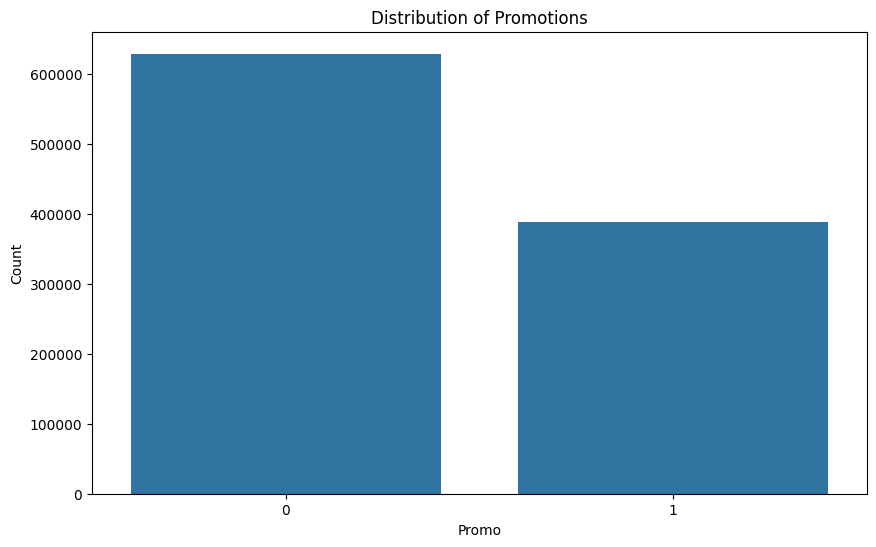

In [21]:
# Distribution of promotions
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=train_data)
plt.title('Distribution of Promotions')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.show()


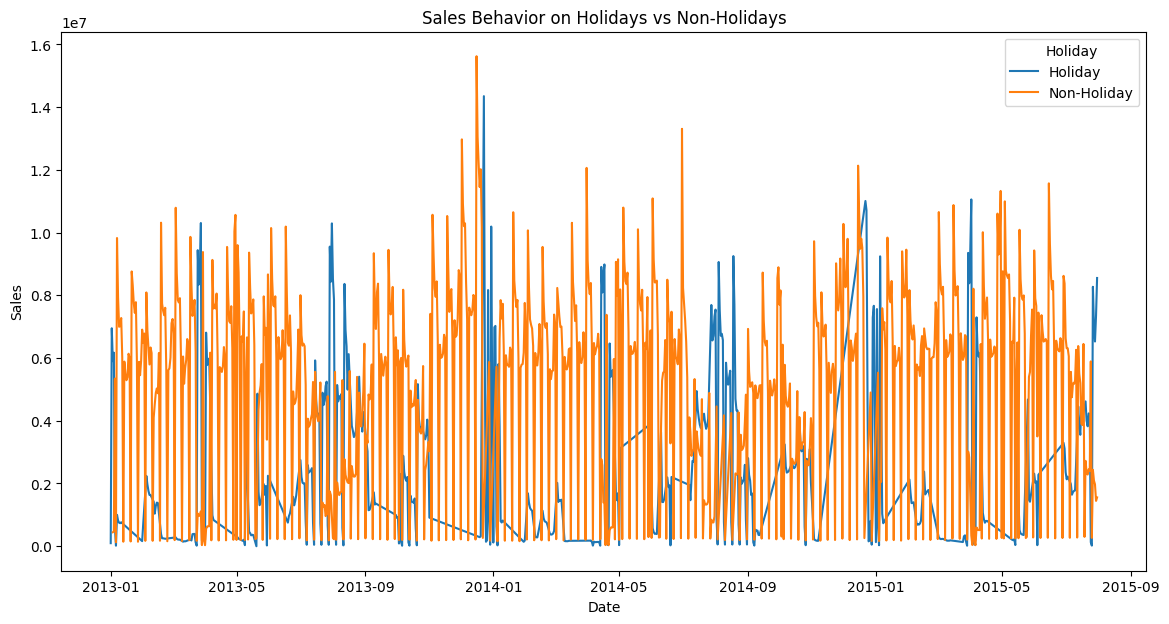

In [22]:
# Sales behavior before, during, and after holidays
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Holiday'] = np.where(train_data['SchoolHoliday'] == 1, 'Holiday', 'Non-Holiday')
sales_by_holiday = train_data.groupby(['Holiday', 'Date'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_holiday, x='Date', y='Sales', hue='Holiday')
plt.title('Sales Behavior on Holidays vs Non-Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


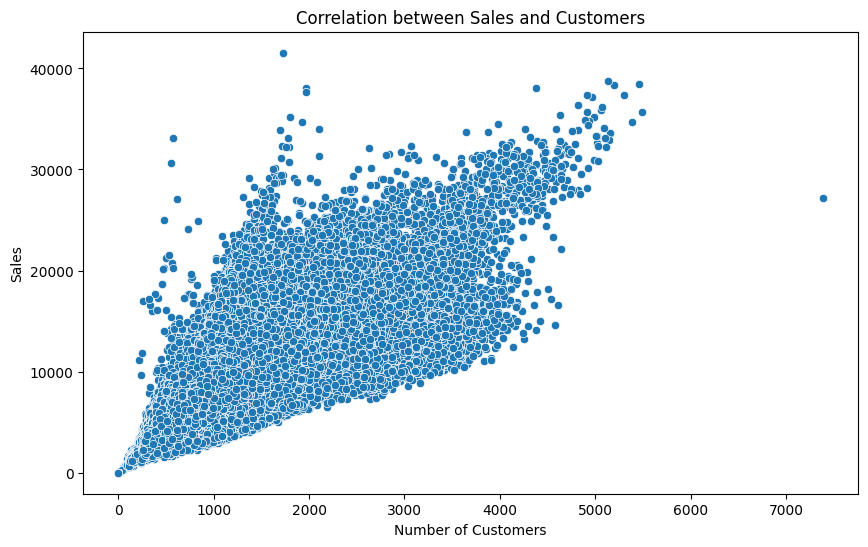

In [23]:
# Correlation between sales and number of customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Correlation between Sales and Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


2024-09-20 15:58:50,864 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 15:58:50,879 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


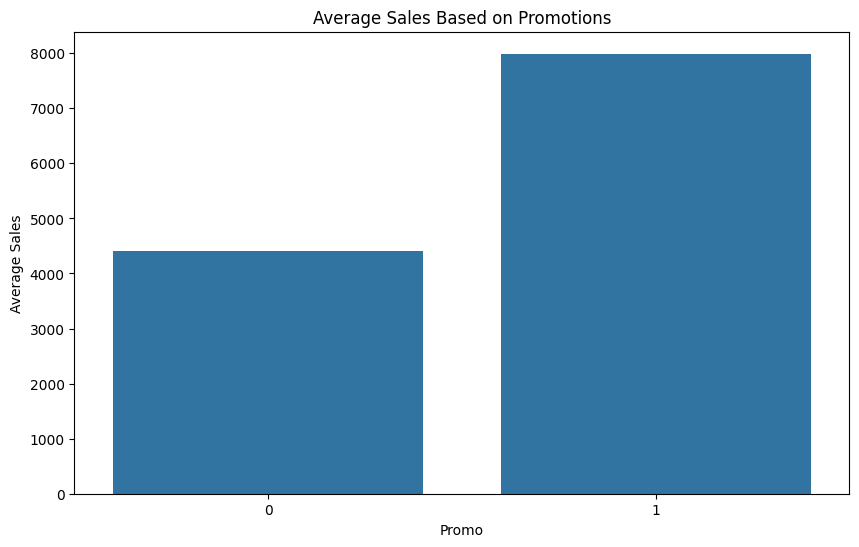

In [24]:
# How promotions affect sales
promo_sales = train_data.groupby('Promo')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Average Sales Based on Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()


In [26]:
# Model Building for Sales Prediction
features = ['Store', 'Promo', 'SchoolHoliday', 'Customers']
X = train_data[features]
y = train_data['Sales']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logging.info("Data prepared and scaled successfully.")


2024-09-20 15:59:32,984 - INFO - Data prepared and scaled successfully.


In [27]:
# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


In [28]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
logging.info(f'Mean Squared Error: {mse}')


2024-09-20 16:12:49,046 - INFO - Mean Squared Error: 370313.11824276345


In [17]:
# Feature Importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Sales Prediction')
plt.show()


In [31]:
# Save the model
model_filename = f'model_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'
joblib.dump(model, model_filename)
logging.info(f'Model saved as {model_filename}')


2024-09-20 16:49:17,905 - INFO - Model saved as model_2024-09-20_16-47-50.pkl
